In [1]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RX, RZ
from mindquantum.io.display import BlochScene
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

[0.85355339-0.35355339j 0.14644661-0.35355339j]


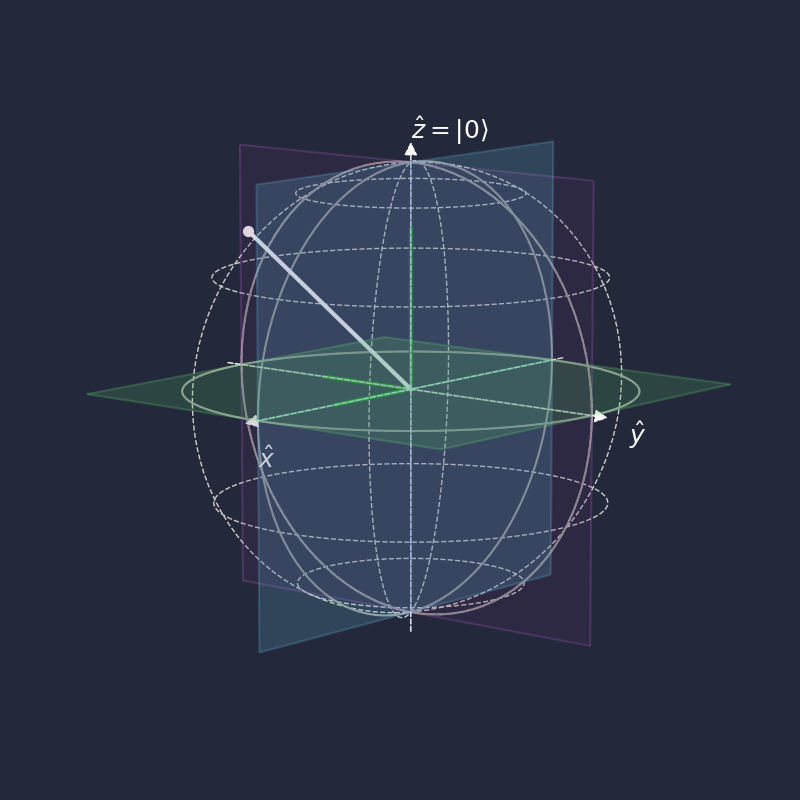

In [2]:
circ = Circuit()               # 搭建制备任意单比特量子态的线路
circ += RX('theta').on(0)      # 通过RX门控制仰角
circ += RZ('phi').on(0)        # 通过RZ门控制方位角
circ.svg()
state1 = circ.get_qs(pr={'theta': np.pi/4, 'phi': np.pi/4})
print(state1)

scene = BlochScene('dark')                       # 创建布洛赫绘图场景
fig, ax = scene.create_scene()             # 初始化场景
state_obj1 = scene.add_state(ax, state1)   # 往场景中添加一个量子

In [3]:
t = np.linspace(0, 10, 500)
all_theta = 4 * np.sin(2 * t)
all_phi = 5 * np.cos(3 * t)
states = []
for theta, phi in zip(all_theta, all_phi):
    states.append(circ.get_qs(pr={'theta': theta, 'phi': phi}))
states = np.array(states)

D:\python\anaconda\envs\PyTorch\lib\site-packages\mindquantum\io\display\bloch_plt_drawer.py:354: RuntimeWarning: invalid value encountered in arccos
  theta = 2 * np.arccos(np.real(amp[0]))


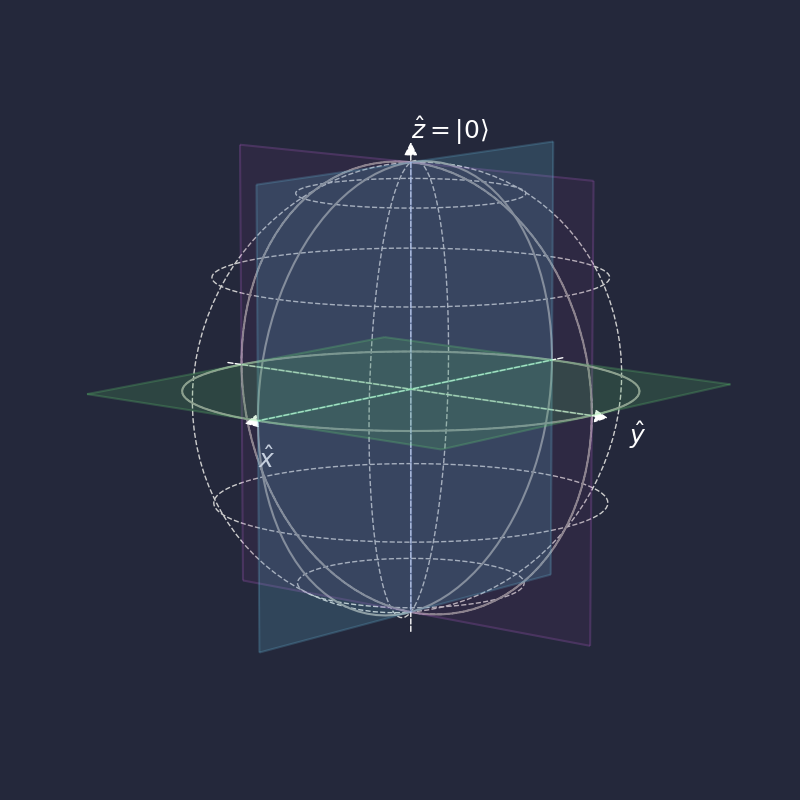

In [4]:
scene2 = BlochScene('dark')                          # 创建布洛赫绘图场景
fig, ax = scene2.create_scene()                      # 初始化场景
state_obj = scene2.add_state(ax, states[0])          # 往场景中添加一个量子态

In [5]:
anim = scene.animation(fig, ax, state_obj, states)

D:\python\anaconda\envs\PyTorch\lib\site-packages\mindquantum\io\display\bloch_plt_drawer.py:533: UserWarning: jupyter environment detected, if animation not work, please install ipympl with '!pip install ipympl' in jupyter notebook and run '%matplotlib ipympl' in cell.
  warnings.warn(


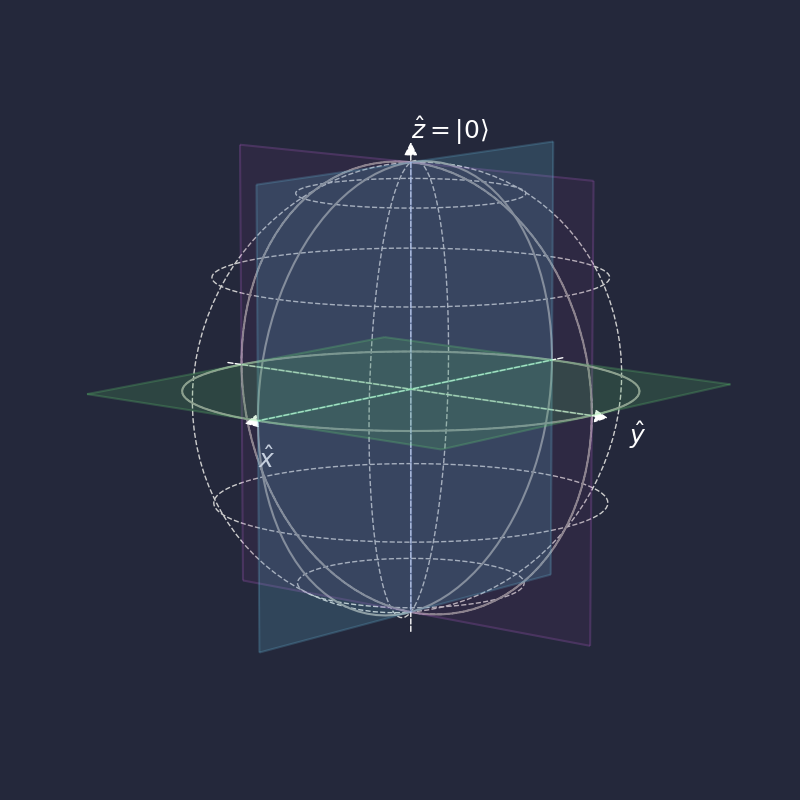

In [6]:
plt.show(anim)